In [1]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [4]:
print(boston.data.shape)

(506, 13)


In [5]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
import pandas as pd
bos = pd.DataFrame(boston.data)

In [8]:
bos.head(1)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98


In [9]:
bos.columns = boston.feature_names
bos.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14


In [10]:
print(boston.target.shape)

(506,)


In [11]:
bos['Price'] = boston.target
bos.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


In [12]:
# split the dependent and independent variable
X = bos.drop("Price",1)   #Feature Matrix
y = bos["Price"]          #Target Variable
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [13]:
df1 = bos.copy()

###### We will perform everything on df1 so that our old data remains safe.

#### Step1 : Create Linear Regression Model

In [27]:
X = df1.drop('Price',axis=1)
y = df1.Price
X_constant = sm.add_constant(X)# for 
model = sm.OLS(y, X_constant).fit()
predictions = model.predict(X_constant)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 28 Jan 2020   Prob (F-statistic):          6.72e-135
Time:                        14:35:56   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0218      1.283      0.017      0.986      -2.500       2.543
CRIM        -6.463e-05      0.035     -0.002      0.999      -0.069       0.069
ZN           2.778e-05      0.015      0.002      0.999      -0.030       0.030
INDUS         1.23e-05      0.061      0.000      1.000      -0.120       0.120
CHAS            0.0016      0.938      0.002      0.999      -1.841       1.845
NOX            -0.0106      2.603     -0.004      0.997      -5.125       5.104
RM              0.0023      0.842      0.003      0.998      -1.652       1.657
AGE          4.142e-07      0.013   3.14e-05      1.000      -0.026       0.026
DIS            -0.0009      0.225     -0.004      0.997      -0.444       0.442
RAD             0.0002      0.068      0.003      0.998      -0.134       0.134
TAX         -7.381e-06      0.004     -0.002      0.999      -0.008       0.008
PTRATIO        -0.0006      0.120     -0.005      0.996      -0.236       0.234
B            5.572e-06      0.003      0.002      0.999      -0.006       0.006
LSTAT          -0.0003      0.079     -0.004      0.997      -0.155       0.154
predictions     0.9994      0.137      7.278      0.000       0.730       1.269
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     2.39e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.78e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### Step 2 : Construct residual Plot

In [15]:
#residual plot
sns.set(style = 'whitegrid')

df1['predictions'] = model.predict(X_constant)
residuals = model.resid
residuals

0      -6.003843
1      -3.425562
2       4.132403
3       4.792964
4       8.256476
5       3.443716
6      -0.101808
7       7.564012
8       4.976363
9      -0.020262
10     -3.999497
11     -2.686796
12      0.793478
13      0.847097
14     -1.083482
15      0.602517
16      2.572490
17      0.588599
18      4.021989
19     -0.206136
20      1.076142
21      1.928963
22     -0.632881
23      0.693715
24     -0.078338
25      0.513314
26      1.136023
27      0.091526
28     -1.147373
29      0.123572
         ...    
476    -3.834816
477     0.457273
478    -4.604963
479    -0.462764
480    -0.468789
481    -3.398873
482    -3.569943
483     0.716012
484     1.144838
485    -1.022259
486    -0.555920
487    -0.725361
488     3.344163
489    -1.223867
490     4.436003
491    -0.159085
492     4.168815
493     1.173379
494     3.887506
495     6.214580
496     5.686792
497    -0.808541
498    -0.098052
499    -0.954988
500    -3.668708
501    -1.133341
502    -1.775719
503    -3.7274

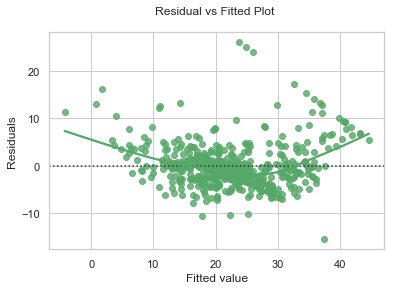

In [16]:
ax = sns.residplot(df1.predictions, residuals, lowess = True, color = 'g')
# lo we ss is a smoothening curving.locally weighted scatter plot smoothing.
ax.set(xlabel = 'Fitted value', ylabel = 'Residuals', title = 'Residual vs Fitted Plot \n')
plt.show()

C:\Users\SRK\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


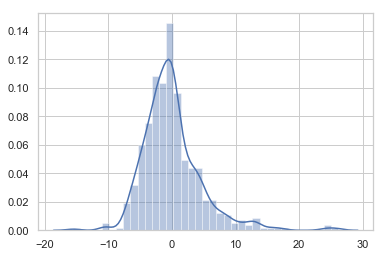

In [17]:
sns.set(style = 'whitegrid')
sns.distplot(residuals)

#### Step 3 : If the residual plot is normal then compute the R2 value, do not transform. If it is not normal then go for transformation. As, here the residual plot is normal so no need of transformation.

###### If suppose this residual plot have not been normal then we would have gone with transformation techniques. Let's see few transformation techniques.

In [18]:
## old data
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [19]:
## for sqrt(X)
df2 = bos.copy()
final_df = df2.transform(lambda x: x**0.5)
final_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.079498,4.242641,1.519868,0.0,0.733485,2.564176,8.074652,2.022375,1.000000,17.204651,3.911521,19.922349,2.231591,4.898979
1,0.165257,0.000000,2.658947,0.0,0.684836,2.533969,8.882567,2.228699,1.414214,15.556349,4.219005,19.922349,3.023243,4.647580
2,0.165197,0.000000,2.658947,0.0,0.684836,2.680485,7.816649,2.228699,1.414214,15.556349,4.219005,19.819939,2.007486,5.890671
3,0.179917,0.000000,1.476482,0.0,0.676757,2.645373,6.767570,2.462154,1.732051,14.899664,4.324350,19.865296,1.714643,5.779273
4,0.262774,0.000000,1.476482,0.0,0.676757,2.673387,7.362065,2.462154,1.732051,14.899664,4.324350,19.922349,2.308679,6.016644


#### Step 4 : Apply Regression

In [20]:
X = final_df.drop('Price',axis=1)
y = final_df.Price
X_constant = sm.add_constant(X)
model = sm.OLS(y, X_constant).fit()
predictions = model.predict(X_constant)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     150.5
Date:                Tue, 28 Jan 2020   Prob (F-statistic):          5.21e-162
Time:                        14:15:13   Log-Likelihood:                -278.08
No. Observations:                 506   AIC:                             584.2
Df Residuals:                     492   BIC:                             643.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.1299      0.908     11.161      0.000       8.347      11.913
CRIM          -0.1512      0.027     -5.638      0.000      -0.204      -0.098
ZN             0.0153      0.010      1.489      0.137      -0.005       0.035
INDUS         -0.0161      0.035     -0.456      0.648      -0.085       0.053
CHAS           0.2378      0.077      3.070      0.002       0.086       0.390
NOX           -2.8083      0.558     -5.033      0.000      -3.905      -1.712
RM             1.0707      0.191      5.594      0.000       0.695       1.447
AGE            0.0116      0.016      0.711      0.478      -0.021       0.044
DIS           -0.6481      0.081     -8.044      0.000      -0.806      -0.490
RAD            0.2430      0.037      6.532      0.000       0.170       0.316
TAX           -0.0447      0.012     -3.785      0.000      -0.068      -0.022
PTRATIO       -0.7331      0.099     -7.408      0.000      -0.928      -0.539
B              0.0212      0.006      3.488      0.001       0.009       0.033
LSTAT         -0.5275      0.035    -15.286      0.000      -0.595      -0.460
==============================================================================
Omnibus:                       81.549   Durbin-Watson:                   1.133
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              210.809
Skew:                           0.807   Prob(JB):                     1.67e-46
Kurtosis:                       5.719   Cond. No.                     1.54e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
#residual plot
sns.set(style = 'whitegrid')

df2['predictions'] = model.predict(X_constant)
residuals = model.resid
residuals

0     -0.579887
1     -0.246512
2      0.318402
3      0.183733
4      0.708898
5      0.167472
6      0.073532
7      0.953317
8      0.538971
9      0.103945
10    -0.276795
11    -0.217788
12     0.215738
13     0.065880
14    -0.085824
15     0.027611
16     0.233144
17     0.164796
18     0.397019
19    -0.016679
20     0.117390
21     0.314163
22     0.086501
23     0.135253
24     0.062331
25     0.000172
26     0.159469
27     0.074271
28     0.050706
29     0.238389
         ...   
476   -0.179511
477    0.042615
478   -0.293695
479    0.214477
480    0.142719
481   -0.177768
482   -0.168250
483    0.118414
484    0.212339
485    0.053960
486    0.162566
487    0.043358
488    0.179100
489   -0.708740
490   -0.106709
491   -0.148887
492    0.394137
493    0.063575
494    0.438751
495    0.704012
496    0.590981
497   -0.089125
498    0.006103
499   -0.178316
500   -0.394136
501    0.072092
502   -0.126021
503   -0.321999
504   -0.329941
505   -1.260714
Length: 506, dtype: floa

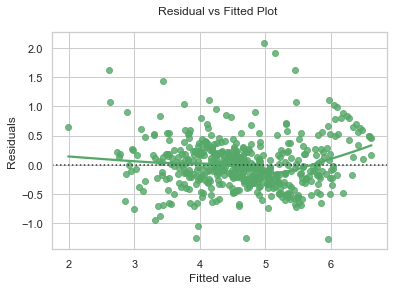

In [22]:
ax = sns.residplot(df2.predictions, residuals, lowess = True, color = 'g')
ax.set(xlabel = 'Fitted value', ylabel = 'Residuals', title = 'Residual vs Fitted Plot \n')
plt.show()

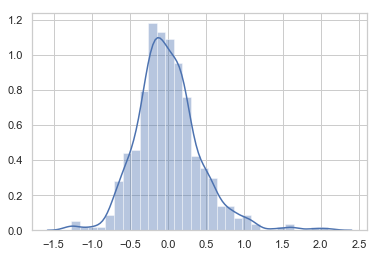

In [23]:
sns.set(style = 'whitegrid')
sns.distplot(residuals)

### Generally we use transformation when the residual plots vary from the normal distribution.

##### Let's see few more transformation techniques

##### log transform

In [24]:
df2 = bos.copy()
df_final1 = df2.transform(lambda X: np.log(X))
df_final1.head()

C:\Users\SRK\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,-5.064036,2.890372,0.837248,-inf,-0.619897,1.883275,4.177459,1.408545,0.000000,5.690359,2.727853,5.983684,1.605430,3.178054
1,-3.600502,-inf,1.955860,-inf,-0.757153,1.859574,4.368181,1.602836,0.693147,5.488938,2.879198,5.983684,2.212660,3.072693
2,-3.601235,-inf,1.955860,-inf,-0.757153,1.971996,4.112512,1.602836,0.693147,5.488938,2.879198,5.973377,1.393766,3.546740
3,-3.430523,-inf,0.779325,-inf,-0.780886,1.945624,3.824284,1.802073,1.098612,5.402677,2.928524,5.977949,1.078410,3.508556
4,-2.672924,-inf,0.779325,-inf,-0.780886,1.966693,3.992681,1.802073,1.098612,5.402677,2.928524,5.983684,1.673351,3.589059


##### Inverse transform

In [25]:
df_final1 = df2.transform(lambda X: 1/X)
df_final1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,158.227848,0.055556,0.432900,inf,1.858736,0.152091,0.015337,0.244499,1.000000,0.003378,0.065359,0.002520,0.200803,0.041667
1,36.616624,inf,0.141443,inf,2.132196,0.155739,0.012674,0.201325,0.500000,0.004132,0.056180,0.002520,0.109409,0.046296
2,36.643459,inf,0.141443,inf,2.132196,0.139179,0.016367,0.201325,0.500000,0.004132,0.056180,0.002546,0.248139,0.028818
3,30.892802,inf,0.458716,inf,2.183406,0.142898,0.021834,0.164957,0.333333,0.004505,0.053476,0.002534,0.340136,0.029940
4,14.482259,inf,0.458716,inf,2.183406,0.139919,0.018450,0.164957,0.333333,0.004505,0.053476,0.002520,0.187617,0.027624


##### exponential transform

In [26]:
df2 = bos.copy()
df_final1 = df2.transform(lambda X: np.exp(X))
df_final1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,1.006340,6.565997e+07,10.074425,1.0,1.712578,716.945624,2.070142e+28,59.739892,2.718282,3.557678e+128,4.412712e+06,2.352230e+172,145.474382,2.648912e+10
1,1.027686,1.000000e+00,1176.148034,1.0,1.598395,614.617424,1.844313e+34,143.609814,7.389056,1.256796e+105,5.375784e+07,2.352230e+172,9320.765132,2.403039e+09
2,1.027666,1.000000e+00,1176.148034,1.0,1.598395,1319.489238,3.430780e+26,143.609814,7.389056,1.256796e+105,5.375784e+07,4.016995e+170,56.260911,1.174948e+15
3,1.032900,1.000000e+00,8.846306,1.0,1.580909,1094.442084,7.774765e+19,429.318900,20.085537,2.590449e+96,1.322229e+08,2.430141e+171,18.915846,3.202106e+14
4,1.071490,1.000000e+00,8.846306,1.0,1.580909,1270.289365,3.457490e+23,429.318900,20.085537,2.590449e+96,1.322229e+08,2.352230e+172,206.437974,5.265750e+15
